In [2]:
import multiprocessing
import datetime
import ephem
import math
import numpy as np
import time as T
import matplotlib.pyplot as plt
# from joblib import Parallel, delayed
#from mpl_toolkits.basemap import Basemap

In [ ]:
# YYYY='2022'
# MM=['01']
# DD = ['09','11','13','15',]
# HH=['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24',]
# HH=['00','01','02','03','04','05','06','07','08']
# MIN=['00','10','20','30','40','50']

In [6]:
def do_solar(para):
    return calc_sunpos(para[0],para[1],para[2])
def calc_sunpos(dtime,row,col):
    sun = ephem.Sun()
    obs = ephem.Observer()
    obs.date = dtime
    obs.lat = latgridrad[row]
    obs.long = longridrad[col]
    sun.compute(obs)
    return np.degrees(sun.az),90.0-np.degrees(sun.alt)

def month_size(month,YYYY):
    big_month=['01','03','05','07','08','10','12']
    small_month=['04','06','09','11']
    if month in big_month:
        s = 31
    elif month in small_month:
        s = 30
    elif month == '02':
        if (int(YYYY) % 4 == 0 and int(YYYY) % 100 != 0) or int(YYYY) % 400 == 0:
            s = 29
        else:
            s = 28
    return s

In [9]:
YYYY='2020'
MM=['03','04','05','06','07','08','09','10','11','12']
DD = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31']
# HH = ['00']
# MIN = ['05']


HH=['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23']
MIN=['05','15','25','35','45','55']

In [ ]:
start = T.time()

for m in range(len(MM)):
    size = month_size(MM[m],YYYY)
    for d in range(size):
        for h in range(len(HH)):
            for mi in range(len(MIN)):
                date=YYYY+MM[m]+DD[d]+HH[h]+MIN[mi] 
                Solar_zM = np.zeros((3000,3000))
                Solar_aM = np.zeros((3000,3000))
                
                dtime = datetime.datetime(int(YYYY),int(MM[m]),int(DD[d]),int(HH[h]),int(MIN[mi]))
                dellon = 0.04
                latgrid=np.linspace(60-dellon/2,-60+dellon/2,3000)
                longrid=np.linspace(85+dellon/2,205-dellon/2,3000)
                latgridrad = latgrid*math.pi/180.0 #radians
                longridrad = longrid*math.pi/180.0 #radians

                
                if __name__ == '__main__':
                    para_solar= []
                    for q in range(3000):
                        for w in range(3000):
                            t=(dtime,w,q)
                            para_solar.append(t)
                    p=multiprocessing.Pool(36)
                    b=p.map(do_solar,para_solar)
                    p.close()
                    p.join()
                    Solar_aM = [i[0] for i in b]
                    Solar_zM = [i[1] for i in b]

                    
                    Solar_aM=np.array(Solar_aM).reshape(3000,3000).T
                    Solar_zM=np.array(Solar_zM).reshape(3000,3000).T
                    
                    
                    
#                     plt.title('Himawari-8 Solar azimuth angle \n {dt}'.format(dt=date),fontsize='large')
#                     plt.imshow(Solar_aM,cmap='terrain_r',origin='upper',vmax=360,vmin=0)
#                     v=np.linspace(0,360,13)
#                     plt.colorbar(ticks=v)
#                     plt.savefig('Solar_azimuth_angle_pic/solar_aM_{d}.jpg'.format(d=date),dpi=6000)
#                     plt.clf()
#                     plt.close()
                    
                    
#                     plt.title('Himawari-8 Solar zenith angle \n {dt}'.format(dt=date),fontsize='large')
#                     plt.imshow(Solar_zM,cmap='terrain_r',origin='upper',vmax=90,vmin=0)
#                     v=np.linspace(0,90,10)
#                     cb=plt.colorbar(ticks=v)
#                     plt.savefig('Solar_zenith_angle_pic/solar_zM_{d}.jpg'.format(d=date),dpi=6000)
#                     plt.clf()
#                     plt.close()
                    
                    datfile_solar_aM_test=open('/data01/GEO/INPUT/ANGLE/Solar_Azimuth_Angle/solar_aM_{da}.dat'.format(da=date),'wb')
                    Solar_aM.tofile(datfile_solar_aM_test)
                    datfile_solar_aM_test.close()

                    datfile_solar_zM_test=open('/data01/GEO/INPUT/ANGLE/Solar_Zenith_Angle/solar_zM_{da}.dat'.format(da=date),'wb')
                    Solar_zM.tofile(datfile_solar_zM_test)
                    datfile_solar_zM_test.close()
end = T.time()

In [8]:
cost=end_time-start_time
print(cost)

19.223385095596313


In [75]:
diff = np.where(abs(diff)<1,diff,np.nan)

In [73]:
abs(diff).max()

3.267494197042396

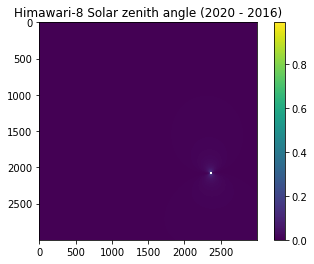

In [77]:
plt.title('Himawari-8 Solar zenith angle (2020 - 2016)',fontsize='large')
plt.imshow(abs(diff),origin='upper',interpolation=None)
plt.colorbar()
# plt.savefig('Solar_azimuth_angle_pic/solar_aM_{d}.jpg'.format(d=date),dpi=6000)
plt.show()